In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [366]:
train = pd.read_csv('C:/Users/Raj Kumar R/Downloads/Loan Prediction/train.csv')
test = pd.read_csv('C:/Users/Raj Kumar R/Downloads/Loan Prediction/test.csv')

In [367]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [368]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [369]:
# make a copy of original data
# so that even if we have to make any changes in these datasets we would not lose the original datasets

train_original = train.copy()
test_original = test.copy()

In [370]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [371]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [373]:
## Finding out percentage of missing values in test data

test_data = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_value = pd.concat([test_data, percent], axis=1, keys = ['Total', 'Percent'])
missing_value.head()

,Total,Percent
Credit_History,29,0.079019
Self_Employed,23,0.062670
Gender,11,0.029973
Dependents,10,0.027248
Loan_Amount_Term,6,0.016349


In [374]:
train.shape, test.shape

((614, 13), (367, 12))

In [375]:
train.columns , test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [376]:
train.drop('Loan_ID', axis=1, inplace=True)
test.drop('Loan_ID', axis=1, inplace=True)

In [377]:
# show the data types for each column of the train set

train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [378]:
# show the data types for each column of the train set

test.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [379]:
# summary of the dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [380]:
# summary of the dataset

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [381]:
# check for missing values

train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [382]:
# replace missing values in Test set with mode/median from Training set

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [383]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

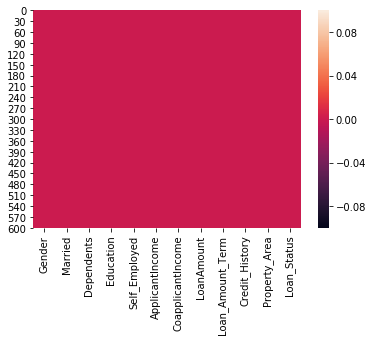

In [384]:
sns.heatmap(train.isnull())

In [385]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [386]:
# replace missing values in Test set with mode/median from Training set

test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [387]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

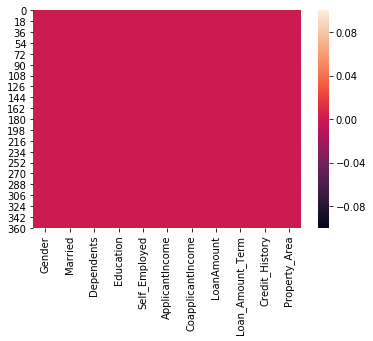

In [388]:
sns.heatmap(test.isnull())

In [389]:
# replacing 3+ in Dependents variable with 3 for both train and test set

train.Dependents.replace('3+', 3 , inplace=True)
test.Dependents.replace('3+', 3 , inplace=True)

In [390]:
train.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [391]:
test.Dependents.value_counts()

0    210
2     59
1     58
3     40
Name: Dependents, dtype: int64

In [392]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively

train.Loan_Status.replace('Y', 1, inplace=True)
train.Loan_Status.replace('N', 0, inplace=True)

In [393]:
train.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

Text(0.5, 0.98, '')

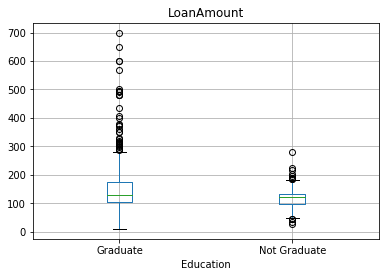

In [394]:
train.boxplot(column='LoanAmount', by = 'Education')
plt.suptitle("")

Text(0.5, 0.98, '')

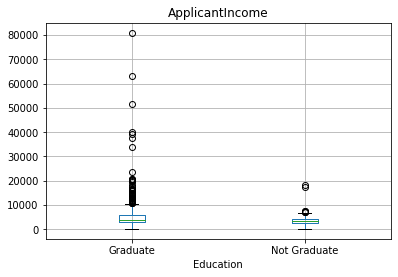

In [395]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

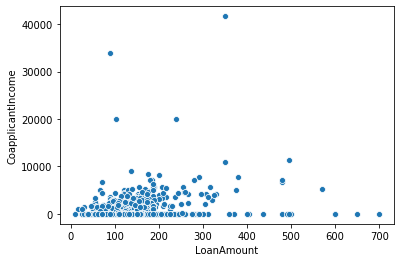

In [396]:
sns.scatterplot(x='LoanAmount', y = 'CoapplicantIncome', data=train)

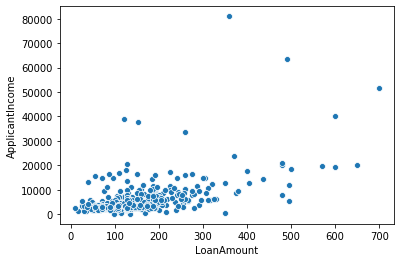

In [397]:
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',data=train)

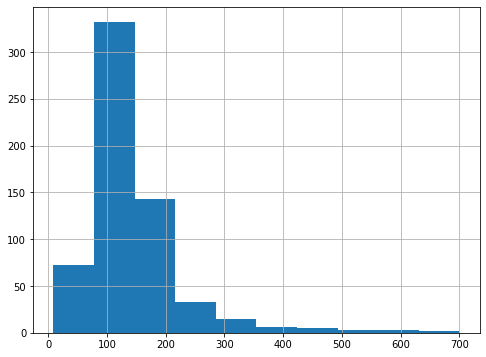

In [398]:
train.LoanAmount.hist(figsize=(8,6))

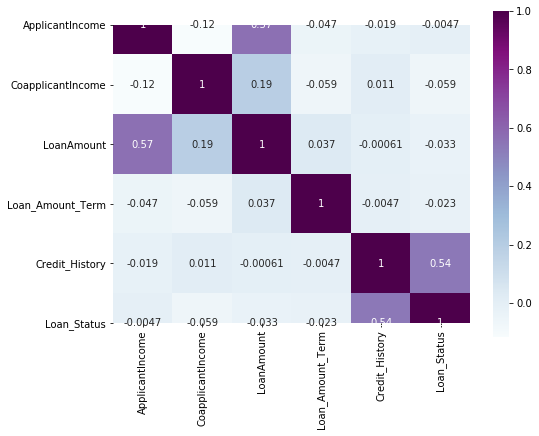

In [399]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corrmat,vmax=1, square=True, cmap="BuPu", annot=True )

In [400]:
# adding dummies to the dataset

train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [401]:
# drop "Loan_Status" and assign it to target variable

X_all = train.drop('Loan_Status', axis=1)
Y_all = train.Loan_Status

In [402]:
from sklearn.model_selection import train_test_split

In [403]:
# split the data into train and cross validation set

X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.3, random_state=0)

## Logistic Regression

In [404]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [405]:
## Logistic Regression

model = LogisticRegression().fit(X_train, y_train )

# make prediction on test

pred_cv = model.predict(X_test)

# calculate accuracy score on test data

accuracy_score(y_test, pred_cv)


C:\Users\Raj Kumar R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8324324324324325

In [406]:
pred = model.predict(X_train)
accuracy_score(y_train, pred)

0.8041958041958042

Text(33.0, 0.5, 'True')

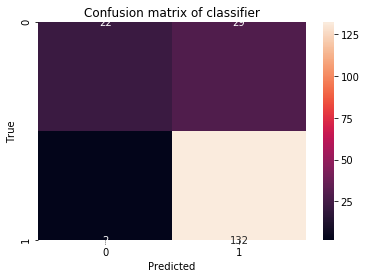

In [407]:
# import confusion_matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_cv)
cm

sns.heatmap(cm,annot=True, fmt='d')
plt.title('Confusion matrix of classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [408]:
# visualize ROC curve
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = metrics.roc_curve(y_test,  pred_cv)
auc = metrics.roc_auc_score(y_test,pred_cv)
auc

0.7082235879426397

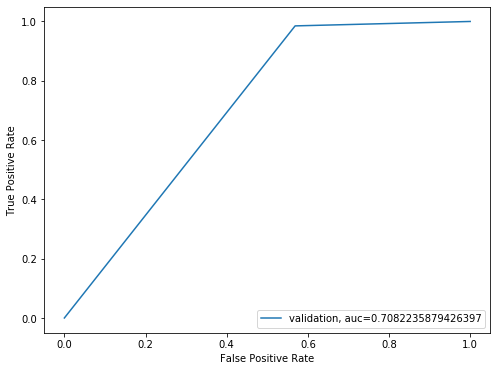

In [409]:
## Roc plot

plt.subplots(figsize=(8,6))
plt.plot(fpr, tpr, label= 'validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Decision Tree Classification

In [410]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_train, y_train)

## prediction on test

predict_tree = tree.predict(X_test)

## Accuracy on test data

accuracy_score(y_test, predict_tree)


0.7621621621621621

In [411]:
## Confusion Matrix

cm = confusion_matrix(y_test, predict_tree)
cm

array([[ 27,  24],
       [ 20, 114]], dtype=int64)

Text(33.0, 0.5, 'True')

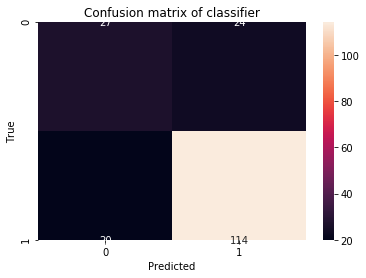

In [412]:
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix of classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [413]:
# visualize ROC curve

fpr, tpr,_ = metrics.roc_curve(y_test, predict_tree)
auc = metrics.roc_auc_score(y_test, predict_tree)
auc

0.6900790166812993

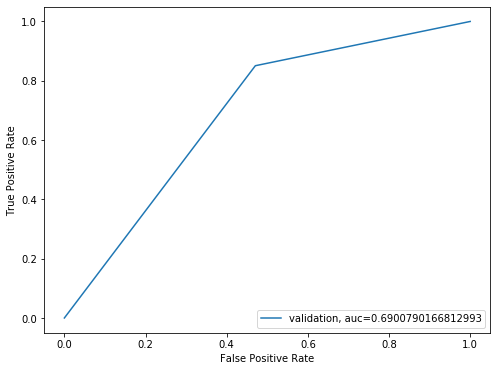

In [414]:
## Roc plot

plt.subplots(figsize=(8,6))
plt.plot(fpr, tpr, label= 'validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

## Random Forest Classification

In [415]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(X_train, y_train)

C:\Users\Raj Kumar R\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [416]:
## Prediction & Accuracy on test data

pred_rfc = rfc.predict(X_test)

## Accuracy on test data

accuracy_score(y_test, pred_rfc)


0.7783783783783784

In [417]:
## Confusion Matrix

cm = confusion_matrix(y_test, pred_rfc)
cm

array([[ 27,  24],
       [ 17, 117]], dtype=int64)

Text(33.0, 0.5, 'True')

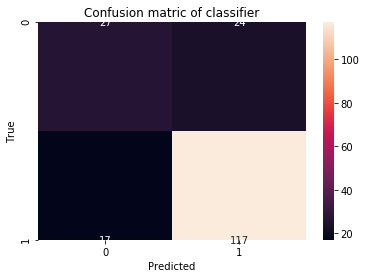

In [418]:
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matric of classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [419]:
## ROC curve visulation
fpr, tpr,_ = metrics.roc_curve(y_test, pred_rfc)
auc = metrics.roc_auc_score(y_test, pred_rfc)
auc

0.7012730465320457

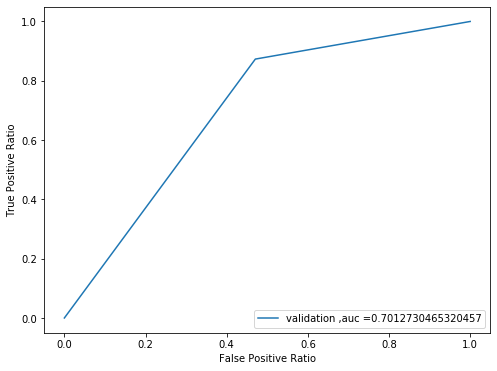

In [420]:
plt.subplots(figsize=(8,6))
plt.plot(fpr, tpr, label='validation ,auc ='+str(auc))
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.legend(loc=4)
plt.show()

## Naive Bayes Classification

In [421]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB().fit(X_train, y_train)

In [424]:
## Prediction

pred_gauss = gauss.predict(X_test)

In [425]:
## Accuracy

accuracy_score(y_test, pred_gauss)

0.8216216216216217

In [427]:
## Confusion Matrix

cm = confusion_matrix(y_test, pred_gauss)
cm

array([[ 22,  29],
       [  4, 130]], dtype=int64)

In [431]:
## ROC Evaluation

fpr, tpr,_ = metrics.roc_curve(y_test, pred_gauss)
auc = metrics.roc_auc_score(y_test, pred_gauss)
auc

0.7007609013754755

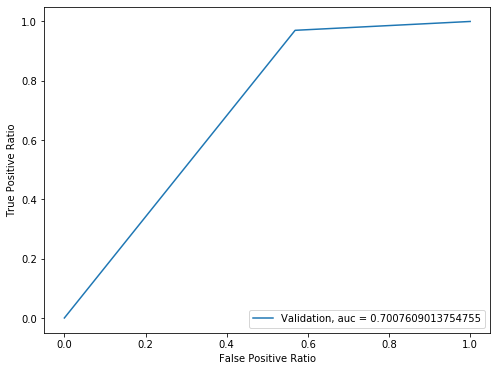

In [436]:
plt.subplots(figsize=(8,6))
plt.plot(fpr, tpr, label='Validation, auc = '+str(auc))
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.legend(loc=4)
plt.show()